In [3]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [4]:
from mlflow import pyfunc

import mlflow.tensorflow

In [2]:
train_dir = r'F:\Datasets\dog-breed-identification\train'

In [3]:
resnet = ResNet50V2(include_top=False, weights='imagenet')

model = Sequential()
model.add(resnet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(120, activation='softmax'))

In [8]:
train_datagen = ImageDataGenerator(samplewise_center=True, 
                                     samplewise_std_normalization=True,
                                     rotation_range=15, zoom_range=0.2,
                                     horizontal_flip=True,
                                     validation_split=0.2
                                    )

train_generator = train_datagen.flow_from_directory(train_dir,
        target_size=(150, 150),
        batch_size=32,
        subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
        target_size=(150, 150),
        batch_size=32,
        subset='validation')

Found 8221 images belonging to 120 classes.
Found 2001 images belonging to 120 classes.


In [9]:
model.build()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
for layer in resnet.layers[:-10]:
    layer.trainable = True

In [11]:
model.fit(train_generator, steps_per_epoch=250, epochs=32,
            validation_data=validation_generator, validation_steps=validation_generator.samples // 32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 62 steps
Epoch 1/32
250/250 [==============================] - 145s 582ms/step - loss: 3.0992 - accuracy: 0.2765 - val_loss: 2.4019 - val_accuracy: 0.3856
Epoch 2/32
250/250 [==============================] - 63s 254ms/step - loss: 1.6751 - accuracy: 0.5407 - val_loss: 2.0278 - val_accuracy: 0.4602
Epoch 3/32
250/250 [==============================] - 64s 255ms/step - loss: 1.1502 - accuracy: 0.6751 - val_loss: 1.9950 - val_accuracy: 0.4899
Epoch 4/32
250/250 [==============================] - 64s 256ms/step - loss: 0.8344 - accuracy: 0.7535 - val_loss: 2.0824 - val_accuracy: 0.4819
Epoch 5/32
250/250 [==============================] - 64s 255ms/step - loss: 0.5837 - accuracy: 0.8221 - val_loss: 2.1687 - val_accuracy: 0.4919
Epoch 6/32
250/250 [==============================] - 64s 255ms/step - loss: 0.4420 - accuracy: 0.8741 - val_loss: 2.1947 - val_accuracy: 0.4995
Epoch 7/32
250/250 [================

In [12]:
model.save(r'C:\Users\Wojtek\Documents\Projects\dog-expert\model\test_model_temp', save_format='h5')

In [18]:
image_path = r'C:\Users\Wojtek\Documents\Projects\dog-expert\flask\app\uploads\york.jpg'

image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [150, 150])
image = tf.cast(image, tf.uint8)

image = image[np.newaxis, ...]

class_lookup = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))

# with open(r'C:\Users\Wojtek\Documents\Projects\dog-expert\model\filename.pickle', 'wb') as handle:
#     pickle.dump(class_lookup, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
result = model.predict(image)[0]

In [23]:
def get_predicted_breed(prediction):
    idx = np.argmax(prediction)
    return class_lookup[idx]

def get_top_5_predicted_breeds(prediction):
    idxs = np.argsort(prediction)[::-1][:5]
    top_5_breeds = []
    for idx in idxs:
        top_5_breeds.append((class_lookup[idx], prediction[idx]))
    return top_5_breeds

In [24]:
get_top_5_predicted_breeds(result)

[('shetland_sheepdog', 1.0),
 ('yorkshire_terrier', 0.0),
 ('chihuahua', 0.0),
 ('clumber', 0.0),
 ('cocker_spaniel', 0.0)]

In [5]:
model = load_model(r'C:\Users\Wojtek\Documents\Projects\dog-expert\model\test_model2')

In [201]:
model

In [202]:
test_model

In [210]:
test_model.predict(image)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.9837503e-37, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [142]:
a = np.argsort(result).flatten()

In [143]:
a[-1]

8

In [146]:
result[a[-2]]

1.4068857e-20

In [144]:
result

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.4795654e-33, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       3.8786506e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [122]:
model.

['dense_7']

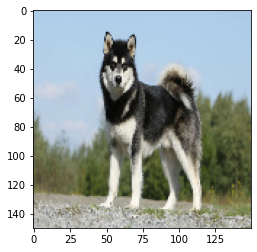

In [116]:
plt.imshow(image.numpy())

In [91]:
import matplotlib.pyplot as plt

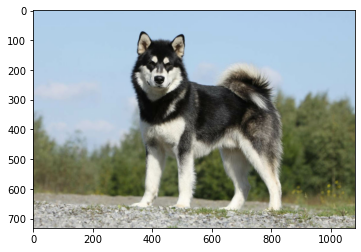

In [92]:
plt.imshow(image)